In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('./crime_std.csv')
print(df)

    Unnamed: 0    Murder   Assault  UrbanPop      Rape
0            0  0.746988  0.654110  0.440678  0.359173
1            1  0.554217  0.746575  0.271186  0.961240
2            2  0.439759  0.852740  0.813559  0.612403
3            3  0.481928  0.496575  0.305085  0.315245
4            4  0.493976  0.791096  1.000000  0.860465
5            5  0.427711  0.544521  0.779661  0.811370
6            6  0.150602  0.222603  0.762712  0.098191
7            7  0.307229  0.660959  0.677966  0.219638
8            8  0.879518  0.993151  0.813559  0.635659
9            9  1.000000  0.568493  0.474576  0.478036
10          10  0.271084  0.003425  0.864407  0.333333
11          11  0.108434  0.256849  0.372881  0.178295
12          12  0.578313  0.698630  0.864407  0.431525
13          13  0.385542  0.232877  0.559322  0.354005
14          14  0.084337  0.037671  0.423729  0.103359
15          15  0.313253  0.239726  0.576271  0.276486
16          16  0.536145  0.219178  0.338983  0.232558
17        

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df.columns)

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


In [4]:
# number of clusters

no_of_clusters = np.arange(1,11)
wss = []
from sklearn.cluster import KMeans 
        # create the model for k number of clusters
for k in no_of_clusters:
    model = KMeans(n_clusters=k, random_state = 12345)
    #fit the data 
    model.fit(df)
    #collect the wss for elbow method 
    wss.append(model.inertia_)
print(wss)   #print the diff between the two points

[13.184122550256447, 6.596893867946197, 5.010878493006418, 3.7175114023035536, 3.5254596921389227, 3.2288489817417103, 2.994498039410428, 2.658608246778528, 2.253021071299575, 2.0078593934356483]


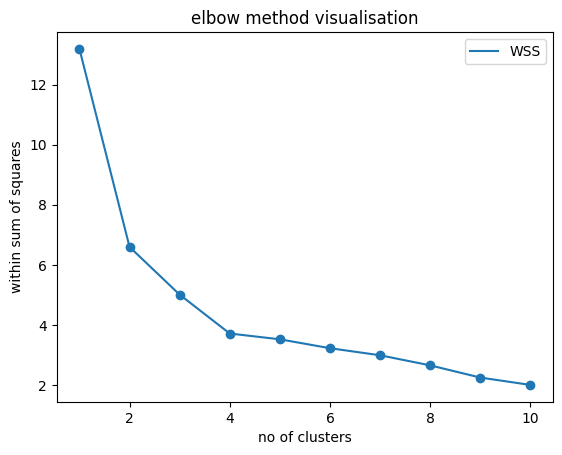

In [5]:
#plot a chart for elbow method 
plt.plot(no_of_clusters, wss, label = 'WSS')
plt.scatter(no_of_clusters, wss)
plt.xlabel("no of clusters")
plt.ylabel("within sum of squares")
plt.title("elbow method visualisation")
plt.legend()
plt.show()

In [6]:
#create the model 
from sklearn.cluster import KMeans 
#create an object of KMeans class
model = KMeans(n_clusters=4, random_state=12345)
model=model.fit(df)
a=model.labels_
print(a)

[3 3 1 3 1 1 0 0 1 3 0 2 1 0 2 0 2 3 2 1 0 1 2 3 0 2 2 1 2 0 1 1 3 2 0 0 0
 0 0 3 2 3 1 0 2 0 0 2 2 0]


In [7]:
ad=pd.DataFrame(a)
print(ad)

    0
0   3
1   3
2   1
3   3
4   1
5   1
6   0
7   0
8   1
9   3
10  0
11  2
12  1
13  0
14  2
15  0
16  2
17  3
18  2
19  1
20  0
21  1
22  2
23  3
24  0
25  2
26  2
27  1
28  2
29  0
30  1
31  1
32  3
33  2
34  0
35  0
36  0
37  0
38  0
39  3
40  2
41  3
42  1
43  0
44  2
45  0
46  0
47  2
48  2
49  0


In [8]:
fd=pd.concat([df,ad],axis=1)
fd

,Murder,Assault,UrbanPop,Rape,0
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,3
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3
